# Building a Machine Learnin Workflow 

### Agenda: 
- Creating Pipline
- Encoding Categorical Features with OneHotEncoding 
- Cross-Validate Pipline
- Make Predictions on New Data by Using Pipline

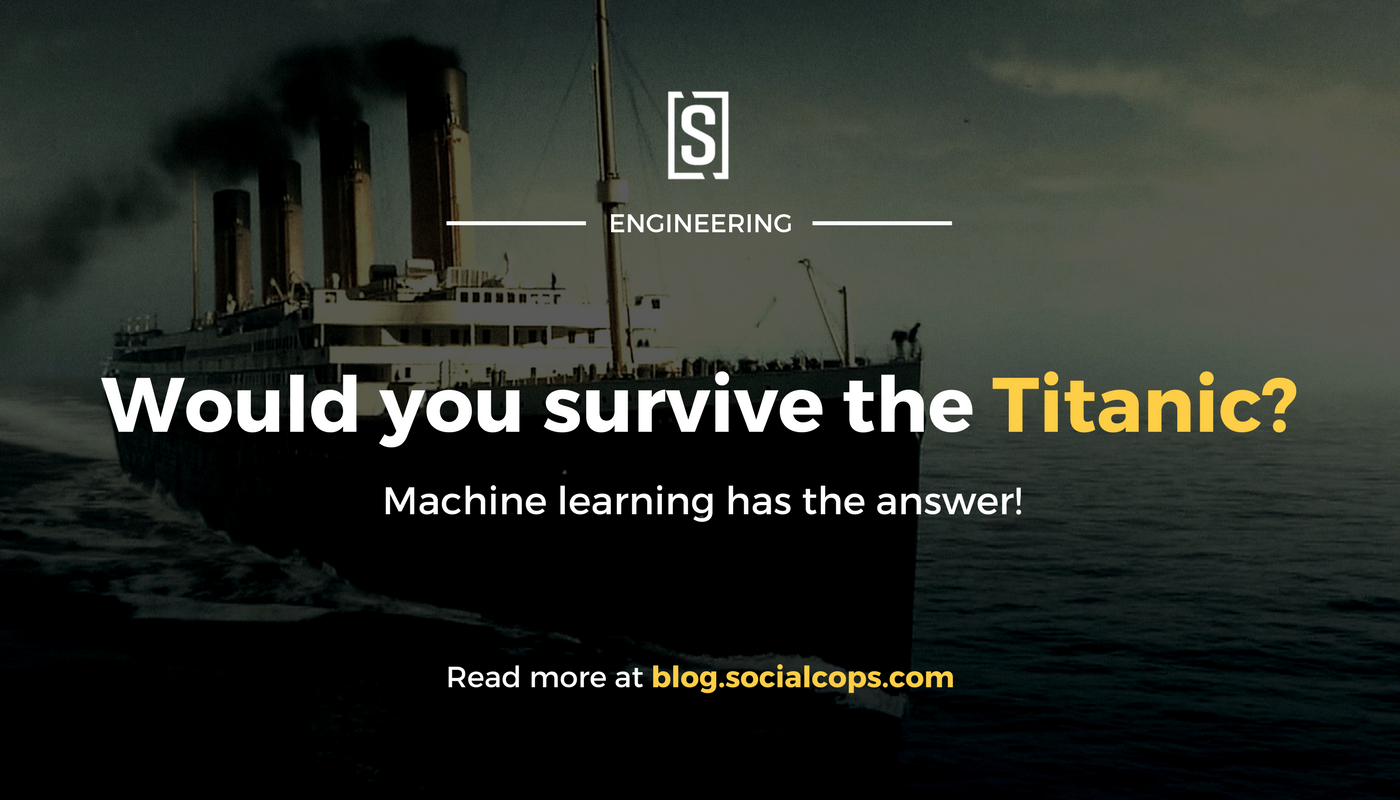

### Load Libraries

In [66]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

### Step1 : Load the Dataset

In [6]:
df = pd.read_csv('http://bit.ly/kaggletrain')

In [7]:
df.shape

(891, 12)

### Step2: Select Features

In [9]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
df = df.loc[df.Embarked.notna(), ['Survived', 'Pclass', 'Sex', 'Embarked']]

In [13]:
df.shape

(889, 4)

In [14]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Embarked    0
dtype: int64

In [15]:
df.head()

,Survived,Pclass,Sex,Embarked
0,0,3,male,S
1,1,1,female,C
2,1,3,female,S
3,1,1,female,S
4,0,3,male,S


### Step 3: Cross-Validate a Model With One Feature

In [17]:
X = df.loc[:, ['Pclass']]
y = df.Survived

In [18]:
X.shape, y.shape

((889, 1), (889,))

In [21]:
LRmodel = LogisticRegression()

In [31]:
cross_val_score(LRmodel, X, y,cv =5,scoring= 'accuracy').mean()

0.6783406335301212

In [32]:
y.value_counts()

0    549
1    340
Name: Survived, dtype: int64

### Step 5: Cross-Validate a Pipeline With All Features

In [34]:
X = df.drop('Survived', axis = 1)

In [37]:
X.head()

,Pclass,Sex,Embarked
0,3,male,S
1,1,female,C
2,3,female,S
3,1,female,S
4,3,male,S


In [46]:
col_transformer = make_column_transformer((OneHotEncoder(), ['Sex', 'Embarked']), 
                                         remainder='passthrough')

In [47]:
col_transformer.fit_transform(X)

array([[0., 1., 0., 0., 1., 3.],
       [1., 0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 1., 3.],
       ...,
       [1., 0., 0., 0., 1., 3.],
       [0., 1., 1., 0., 0., 1.],
       [0., 1., 0., 1., 0., 3.]])

In [51]:
from sklearn.pipeline import make_pipeline

In [53]:
pip = make_pipeline(col_transformer, LRmodel)

In [54]:
cross_val_score(pip, X, y,cv =5,scoring= 'accuracy').mean()

0.7727924839713071

### Step 6: Make Predictions on "new" Data

In [61]:
new = X.sample(5, random_state = 42)

In [62]:
new

,Pclass,Sex,Embarked
281,3,male,S
435,1,female,S
39,3,female,C
418,2,male,S
585,1,female,S


In [63]:
pip.fit(X,y)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=True),
                                                  ['Sex', 'Embarked'])],
                                   verbose=False)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                         

In [64]:
pip.predict(new)

array([0, 1, 1, 0, 1])

#### _End!_